# Usage example: State-based connectivity

Currently, all state-based connectivity methods are wrappers for the pydfc package from Torabi et al. (2024): https://github.com/neurodatascience/dFC.


> Mohammad Torabi, Georgios D Mitsis, Jean-Baptiste Poline, On the variability of dynamic functional connectivity<br>assessment methods, GigaScience, Volume 13, 2024, giae009, https://doi.org/10.1093/gigascience/giae009.

As state-based connectivity analysis requires data from multiple subjects, we start by getting some pre-processed data from the ABIDE dataset:

In [1]:
import numpy as np
from nilearn import datasets
from matplotlib import pyplot as plt
from comet import utils, connectivity

subjects = ["50008", "50010", "50012", "50014", "50020"]
data = datasets.fetch_abide_pcp(SUB_ID=subjects, pipeline='cpac', band_pass_filtering=True, derivatives="rois_dosenbach160", legacy_format=False)
ts = data.rois_dosenbach160 # list of 2D time series data (5 x 196 x 161)

# Transpose each 2D time series data as time needs to be the second dimension for the pydfc package
for i in range(len(ts)):
    ts[i] = ts[i].T

print("Num subjects:",len(ts))
print("TS shape:", ts[0].shape)

[get_dataset_dir] Dataset found in /home/mibur/nilearn_data/ABIDE_pcp
Num subjects: 5
TS shape: (161, 196)


We then need put the data in a `pydfc.TIME_SERIES` object, as this is the required input for all state-based methods:

In [2]:
state_fc_input = utils.create_state_fc_input(data=ts, subjects=subjects, tr=2.5)

Creating TIME_SERIES object with time series of shape: (161, 196).
Please make sure time is the second dimension (otherwise transpose the input data first).


We can then call any of the state-based connectivity methods. Calling `.estimate()` will estimate the states for all subjects based on all data:

In [3]:
method_obj = connectivity.Windowless(state_fc_input, n_states=5, n_subj_clusters=5).estimate()

We can then get the dFC for a single subject and extract the relevant information from the dFC object:

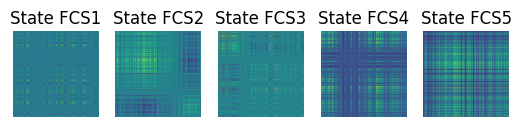

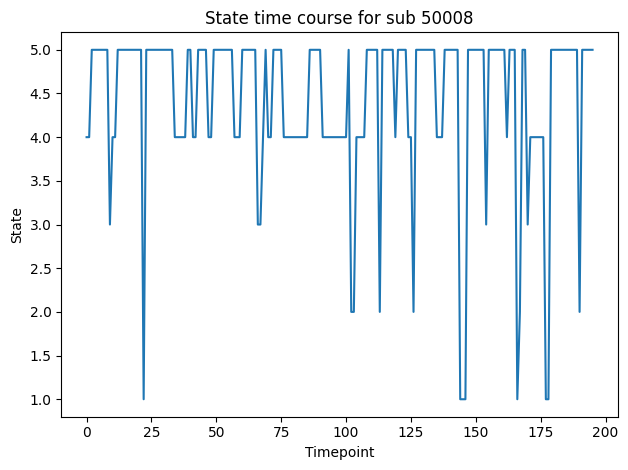

In [14]:
# Get the dFC object for a specific subject
dfc_obj = method_obj.estimate_dFC(time_series=state_fc_input.get_subj_ts(subjs_id=subjects[0])) 

# Extract dFC information
dfc_data = np.transpose(dfc_obj.get_dFC_mat(), (1, 2, 0))  # 3D dFC matrix (roi x roi x state_estimates)
dfc_states = dfc_obj.FCSs_                                 # Dict with state matrices. Keys: "FCS1", FC2S", etc.
dfc_state_tc = dfc_obj.state_TC()                          # State time courses

# Plot all estimated states
fig, ax = plt.subplots(1, len(dfc_states.keys()))
for i, key in enumerate(dfc_states.keys()):
    ax[i].imshow(dfc_states[key])
    ax[i].set_title(f"State {key}")
    ax[i].axis("off")

# Plot the state time course for a single subject
fig, ax = plt.subplots()
ax.plot(dfc_state_tc)
ax.set(title=f"State time course for sub {subjects[0]}", xlabel="Timepoint", ylabel="State")

plt.tight_layout();